In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### Load the data

In [2]:
data = pd.read_json('train.json')

In [3]:
data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


### Basic information of cuisines and ingredients

In [4]:
# the list of cuisines
NCuisine = data['cuisine'].nunique()
cuisineList = data['cuisine'].unique()
print('All cuisines:',[cuisine for cuisine in cuisineList])

All cuisines: ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


In [5]:
# the number of recipes in each cuisine
data['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [6]:
# the list of ingredients
ingredientBag = [ingredient for i in range(data.shape[0]) for ingredient in data.loc[i,'ingredients']]
ingredientList = list(set(ingredientBag))
NIngredient = len(ingredientList)
print('In total:', str(NIngredient), 'ingredients')

In total: 6714 ingredients


#### Ingredient counts (total and separately for each cuisine)

In [7]:
# ingredient count (in total and in each cuisine)
count = []
count.append(dict(Counter(ingredientBag)))
for cuisine in cuisineList:
    dataCuisine = data[data['cuisine']==cuisine].copy().reset_index()
    count.append(dict(Counter([ingredient for i in range(dataCuisine.shape[0]) for ingredient in dataCuisine.loc[i,'ingredients']])))
ingredientCount = pd.DataFrame(count).T
ingredientCount.columns = ['total'] + [cuisine for cuisine in cuisineList]
ingredientCount = ingredientCount.fillna(0)
ingredientCount.head()

,total,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,...,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
( oz.) tomato sauce,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
( oz.) tomato paste,9.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(10 oz.) frozen chopped spinach,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(10 oz.) frozen chopped spinach, thawed and squeezed dry",2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(14 oz.) sweetened condensed milk,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Characterizing the cuisines (common and signature ingredients) and their relationships

#### The most common ingredients in each cuisine

In [8]:
print('Top 10 common ingredients in each cuisine:')
Ntop = 10
for cuisine in cuisineList:
    print(cuisine,': ', ingredientCount.nlargest(Ntop, cuisine).index.values)

Top 10 common ingredients in each cuisine:
greek :  ['salt' 'olive oil' 'dried oregano' 'garlic cloves' 'feta cheese crumbles'
 'extra-virgin olive oil' 'fresh lemon juice' 'ground black pepper'
 'garlic' 'pepper']
southern_us :  ['salt' 'butter' 'all-purpose flour' 'sugar' 'large eggs' 'baking powder'
 'water' 'unsalted butter' 'milk' 'buttermilk']
filipino :  ['salt' 'garlic' 'onions' 'water' 'soy sauce' 'pepper' 'oil' 'sugar'
 'carrots' 'ground black pepper']
indian :  ['salt' 'onions' 'garam masala' 'water' 'ground turmeric' 'garlic'
 'cumin seed' 'ground cumin' 'vegetable oil' 'oil']
jamaican :  ['salt' 'onions' 'water' 'garlic' 'ground allspice' 'pepper' 'scallions'
 'dried thyme' 'black pepper' 'garlic cloves']
spanish :  ['salt' 'olive oil' 'garlic cloves' 'extra-virgin olive oil' 'onions'
 'water' 'tomatoes' 'ground black pepper' 'red bell pepper' 'pepper']
italian :  ['salt' 'olive oil' 'garlic cloves' 'grated parmesan cheese' 'garlic'
 'ground black pepper' 'extra-virgin oli

#### The most "signature" ingredients in each cuisine

In [9]:
# ingredients with top TF-IDF in each cuisine
# original formula for TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

# the frequency of an ingredient in each cuisine (proportion of recipes with this ingredient for a cuisine)
ingredientFrequency = ingredientCount[[cuisine for cuisine in cuisineList]].div(data['cuisine'].value_counts()[cuisine], axis=1)
# inverse document frequency: 1/log(proportion of cuisines that have this ingredient)
IDF = np.log(data['cuisine'].nunique()/(ingredientCount[[cuisine for cuisine in cuisineList]]>0).sum(axis=1))
# TF-IDF = TF*IDF
ingredientTFIDF = ingredientFrequency.multiply(IDF, axis=0)

print('Top 10 *signature* ingredients in each cuisine (according to TF-IDF):')
Ntop = 10
for cuisine in cuisineList:
    print(cuisine,': ', ingredientTFIDF.nlargest(Ntop, cuisine).index.values)

Top 10 *signature* ingredients in each cuisine (according to TF-IDF):
greek :  ['feta cheese crumbles' 'feta cheese' 'dried oregano' 'greek seasoning'
 'pitted kalamata olives' 'kalamata' 'fresh oregano' 'phyllo dough'
 'ground lamb' 'grape leaves']
southern_us :  ['grits' 'collard greens' 'buttermilk' 'bourbon whiskey'
 'quickcooking grits' 'yellow corn meal' 'white cornmeal' 'chopped pecans'
 'black-eyed peas' 'cajun seasoning']
filipino :  ['fish sauce' 'calamansi juice' 'lumpia wrappers' 'calamansi'
 'lumpia skins' 'oyster sauce' 'thai chile' 'shrimp paste' 'pork belly'
 'fried garlic']
indian :  ['garam masala' 'curry leaves' 'paneer' 'ghee' 'coriander powder'
 'cumin seed' 'asafoetida' 'urad dal' 'black mustard seeds'
 'green chilies']
jamaican :  ['scotch bonnet chile' 'jamaican jerk season' 'ackee' 'callaloo'
 'jerk seasoning' 'ground allspice' 'thyme' 'dark rum' 'allspice'
 'jerk sauce']
spanish :  ['saffron threads' 'chorizo sausage' 'spanish chorizo' 'serrano ham'
 'manchego

#### Cuisine similarity, based on ingredient frequency (correlation between ingredient frequency vectors)

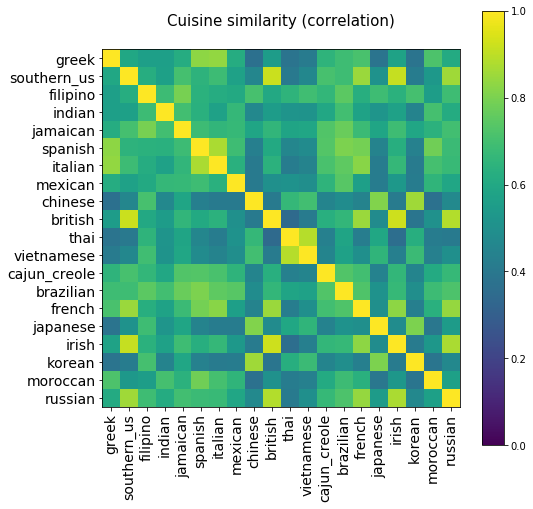

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Cuisine similarity (correlation)', fontsize=15)
p = ax.matshow(ingredientFrequency[cuisineList].corr(), vmin=0, vmax=1)
ax.set_xticks(range(NCuisine))
ax.set_xticklabels(labels=cuisineList, rotation=90, fontsize=14)
ax.xaxis.tick_bottom()
ax.set_yticks(range(NCuisine))
ax.set_yticklabels(labels=cuisineList, fontsize=14)
fig.colorbar(p)
plt.show()

In [21]:
# top 20 correlations between cuisines
Ntop = 20
corrmat = ingredientFrequency[cuisineList].corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
np.fill_diagonal(mask, False)
print('Top 20 similarity between cuisines:\n')
print((corrmat*mask).unstack().sort_values(ascending=False)[:Ntop])

Top 20 similarity between cuisines:

british      irish         0.922370
southern_us  british       0.919172
             irish         0.910585
thai         vietnamese    0.890030
british      russian       0.883474
irish        russian       0.874092
spanish      italian       0.873685
southern_us  russian       0.858054
chinese      korean        0.856162
british      french        0.849418
southern_us  french        0.849405
french       russian       0.840749
greek        italian       0.837387
             spanish       0.830455
french       irish         0.828837
italian      french        0.822330
chinese      japanese      0.810132
japanese     korean        0.801565
spanish      brazilian     0.801138
filipino     jamaican      0.793137
dtype: float64


#### Clustering cuisines (w/ k-means) based on ingredient frequency

Cluster 1 : ['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'chinese'
 'british' 'thai' 'vietnamese' 'cajun_creole' 'brazilian' 'french'
 'japanese' 'irish' 'korean' 'moroccan' 'russian']
Cluster 2 : ['italian' 'mexican']

Cluster 1 : ['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'chinese'
 'british' 'thai' 'vietnamese' 'cajun_creole' 'brazilian' 'french'
 'japanese' 'irish' 'korean' 'moroccan' 'russian']
Cluster 2 : ['mexican']
Cluster 3 : ['italian']

Cluster 1 : ['southern_us' 'indian' 'french']
Cluster 2 : ['greek' 'filipino' 'jamaican' 'spanish' 'chinese' 'british' 'thai'
 'vietnamese' 'cajun_creole' 'brazilian' 'japanese' 'irish' 'korean'
 'moroccan' 'russian']
Cluster 3 : ['italian']
Cluster 4 : ['mexican']

Cluster 1 : ['indian' 'chinese']
Cluster 2 : ['italian']
Cluster 3 : ['mexican']
Cluster 4 : ['greek' 'filipino' 'jamaican' 'spanish' 'british' 'thai' 'vietnamese'
 'cajun_creole' 'brazilian' 'french' 'japanese' 'irish' 'korean'
 'moroccan' 

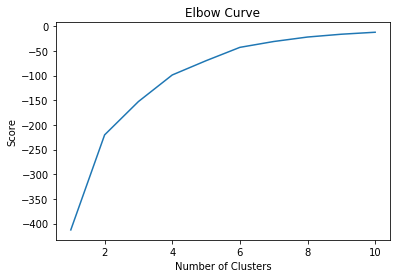

For n_clusters = 2 The average silhouette_score is : 0.627524538519264
For n_clusters = 3 The average silhouette_score is : 0.6023804915427509
For n_clusters = 4 The average silhouette_score is : 0.42806735955189923
For n_clusters = 5 The average silhouette_score is : 0.4463797352202846
For n_clusters = 6 The average silhouette_score is : 0.43756605755917094
For n_clusters = 7 The average silhouette_score is : 0.32170405145796993
For n_clusters = 8 The average silhouette_score is : 0.18266606660463156
For n_clusters = 9 The average silhouette_score is : 0.185189290093282
For n_clusters = 10 The average silhouette_score is : 0.1530815921610222


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = ingredientFrequency.T

NClusterMax = 10
fits_kmeans = [KMeans(n_clusters=i, random_state=0).fit(X) for i in np.arange(NClusterMax)+1]

# clusering results
for NCluster in np.arange(1,NClusterMax)+1:
    for iCluster in range(NCluster):
        print('Cluster', iCluster+1, ':', ingredientFrequency.T.index.values[fits_kmeans[NCluster-1].labels_==iCluster])
    print('')

# Elbow method
scores = [fit.score(X) for fit in fits_kmeans]
plt.plot(np.arange(NClusterMax)+1, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Silhouette_analysis
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
for NCluster in np.arange(1,NClusterMax)+1:
    cluster_labels = fits_kmeans[NCluster-1].fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", NCluster,
          "The average silhouette_score is :", silhouette_avg)
